In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df= pd.read_csv("restaurant review comments.csv",encoding = "ISO-8859-1")

In [5]:
df.head()

,tweet,senti
0,turn off betul kedai makan bancuh air tak seda...,-1
1,Mende tah aku makan tadi. Tak sedap. *sebab bo...,-1
2,"@nikasyrvf Mestii, sini kedai makan bukan seda...",-1
3,Tapi milo dekat fast food restaurant tak sedap...,-1
4,Semua makanan bau tengik. Loya tekak dibuatnya...,-1


In [7]:
class_count = df['senti'].value_counts()
class_count

 1    280
-1    183
 0    137
Name: senti, dtype: int64

Text(0, 0.5, 'Number of reviews ')

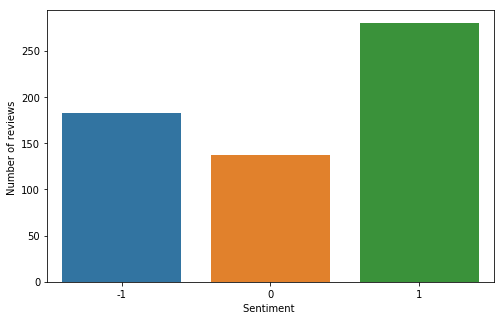

In [8]:
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

ML method

In [10]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = TweetTokenizer()

In [11]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
vectorizer.fit(df['tweet'])
train_vectorized = vectorizer.transform(df['tweet'])
# test_vectorized = vectorizer.transform(test['Phrase'])

In [12]:
y = df['senti']

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_val, y_train , y_val = train_test_split(train_vectorized,y,test_size = 0.2)

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [16]:
lr = LogisticRegression()
ovr = OneVsRestClassifier(lr)
ovr.fit(x_train,y_train)
print(classification_report( ovr.predict(x_val) , y_val))
print(accuracy_score( ovr.predict(x_val) , y_val ))

              precision    recall  f1-score   support

          -1       0.14      0.62      0.23         8
           0       0.03      1.00      0.05         1
           1       0.98      0.42      0.59       111

   micro avg       0.44      0.44      0.44       120
   macro avg       0.38      0.68      0.29       120
weighted avg       0.92      0.44      0.56       120

0.44166666666666665


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
svm = LinearSVC()
svm.fit(x_train,y_train)
print(classification_report( svm.predict(x_val) , y_val))
print(accuracy_score( svm.predict(x_val) , y_val ))

              precision    recall  f1-score   support

          -1       0.56      0.71      0.63        28
           0       0.14      0.71      0.23         7
           1       0.90      0.51      0.65        85

   micro avg       0.57      0.57      0.57       120
   macro avg       0.53      0.64      0.50       120
weighted avg       0.77      0.57      0.62       120

0.5666666666666667


In [18]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
print(classification_report( mnb.predict(x_val) , y_val))
print(accuracy_score( mnb.predict(x_val) , y_val ))

              precision    recall  f1-score   support

          -1       0.08      0.75      0.15         4
           0       0.03      1.00      0.05         1
           1       1.00      0.42      0.59       115

   micro avg       0.43      0.43      0.43       120
   macro avg       0.37      0.72      0.26       120
weighted avg       0.96      0.43      0.57       120

0.43333333333333335


In [22]:
from malay_stopwords import stopwords, stopwords_1, _list_laugh
from malay_normalization import rules_normalizer, sounds

In [23]:
#pre-processing normalization
def _dict_replace(wordlist, _dict):
        return [_dict.get(w, w) for w in wordlist]

def cleaning2(e_texts,rules):
    text1 = e_texts.split()   
    text1 = _dict_replace(text1, rules)
    text1 = ' '.join(text1)
    return text1

In [26]:
#preprocessing removing stopwords & symbol
import re
STOPWORDS = set(stopwords + stopwords_1 + _list_laugh)
def clean_tweet(tweet):
    comments = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[^a-zA-Z#]"," ",str(tweet)).split())
    comments = comments.lower().split()
    comments = ' '.join([word for word in comments if word not in STOPWORDS])
    return comments

In [32]:
df_m=df
import numpy as np
df_m['tweets']=np.array([clean_tweet(text) for text in df.tweet])
df_m.head(5)

,tweet,senti,tweets
0,turn off betul kedai makan bancuh air tak seda...,-1,turn off makan bancuh air tak sedap ni tak pay...
1,Mende tah aku makan tadi. Tak sedap. *sebab bo...,-1,mende tah makan tak sedap claim makan mengarut
2,"@nikasyrvf Mestii, sini kedai makan bukan seda...",-1,mestii makan bukan sedap haha
3,Tapi milo dekat fast food restaurant tak sedap...,-1,milo fast food restaurant tak sedap
4,Semua makanan bau tengik. Loya tekak dibuatnya...,-1,bau tengik loya tekak ape teruk peel demam pre...


In [33]:
df['tweets']=np.array([cleaning2(text,rules_normalizer) for text in df.tweets])
df.head(5)

,tweet,senti,tweets
0,turn off betul kedai makan bancuh air tak seda...,-1,turn off makan bancuh air tak sedap ini tak pa...
1,Mende tah aku makan tadi. Tak sedap. *sebab bo...,-1,mende entah makan tak sedap claim makan mengarut
2,"@nikasyrvf Mestii, sini kedai makan bukan seda...",-1,mestii makan bukan sedap haha
3,Tapi milo dekat fast food restaurant tak sedap...,-1,milo fast food restaurant tak sedap
4,Semua makanan bau tengik. Loya tekak dibuatnya...,-1,bau tengik loya tekak apa teruk peel demam pre...


In [34]:
df['tweets']=np.array([cleaning2(text,sounds) for text in df.tweets])
df.head(5)

,tweet,senti,tweets
0,turn off betul kedai makan bancuh air tak seda...,-1,turn off makan bancuh air tak sedap ini tak pa...
1,Mende tah aku makan tadi. Tak sedap. *sebab bo...,-1,mende entah makan tak sedap claim makan mengarut
2,"@nikasyrvf Mestii, sini kedai makan bukan seda...",-1,mestii makan bukan sedap haha
3,Tapi milo dekat fast food restaurant tak sedap...,-1,milo fast food restaurant tak sedap
4,Semua makanan bau tengik. Loya tekak dibuatnya...,-1,bau tengik loya tekak apa teruk peel demam pre...


In [35]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer_m = TweetTokenizer()

In [36]:
vectorizer_m = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer_m.tokenize)
vectorizer_m.fit(df_m['tweets'])
train_vectorized_m = vectorizer_m.transform(df_m['tweets'])

In [38]:
y_m=df_m['senti']

In [39]:
from sklearn.model_selection import train_test_split
x_train_m , x_val_m, y_train_m , y_val_m = train_test_split(train_vectorized_m,y_m,test_size = 0.2)

In [40]:
lr_m = LogisticRegression()
ovr_m = OneVsRestClassifier(lr_m)
ovr_m.fit(x_train_m,y_train_m)
print(classification_report( ovr_m.predict(x_val_m) , y_val_m))
print(accuracy_score( ovr_m.predict(x_val_m) , y_val_m ))

              precision    recall  f1-score   support

          -1       0.30      0.86      0.44        14
           0       0.04      1.00      0.07         1
           1       1.00      0.50      0.67       105

   micro avg       0.55      0.55      0.55       120
   macro avg       0.45      0.79      0.40       120
weighted avg       0.91      0.55      0.64       120

0.55


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
svm_m = LinearSVC()
svm_m.fit(x_train_m,y_train_m)
print(classification_report( svm_m.predict(x_val_m) , y_val_m))
print(accuracy_score( svm_m.predict(x_val_m) , y_val_m ))

              precision    recall  f1-score   support

          -1       0.70      0.88      0.78        32
           0       0.26      0.88      0.40         8
           1       0.98      0.65      0.78        80

   micro avg       0.72      0.72      0.73       120
   macro avg       0.65      0.80      0.65       120
weighted avg       0.86      0.72      0.76       120

0.725
